# Conclusion script

### Problem definition
This problem required utilization of such factors as the weather, time of year, time of week, time of day and unknown factors to predict the number of rented bikes per each hour. Based on this, the appropriate number of bikes would be supplied in the future, knowing in advance the values of factors provided to the model. <br>
Importantly, since the min date was 2017-12-01 and max date - 2018-11-30, we shouldn't have cut the last part of data (last, in terms of date) and treat the data as a time series. The problem would be biased then, because we would miss whole Autumn variable and probably part of extreme weather data. Instead, we decided to train and test model on random samples and treat the final model as a product/tool for the future (after 2018-11-30) challenges.

### In the data preparation process we excluded:<br>
- id (not meaningfull),<br>
- Date (utilized for "Weekend" variable creation, which helped to avoid seasonality factor bias),<br>
- feat1-7 and feat10 (low model improvement, low correlation with target variable, increase in time and memory-consumption),<br>
- rainfall and snowfall (negligible  model improvement, binary transformation with better correlation used instead).<br><br>

### For this problem we trained **three individual machine learning algorithms**: <br>
- Random Forest (train MAPE 7.64, test MAPE 9.00), <br>
- XGBoost (train MAPE 6.35, test MAPE 7.65),<br>
- Decision Tree Regression (train MAPE 9.09, test MAPE 10.67),<br>
#### and then created **an ensemble model (stacking)** to combine their predictions (train MAPE 6.89, test MAPE 8.54).<br>

To evaluate the performance of our predictive models, we utilized the Mean Absolute Percentage Error (MAPE). 

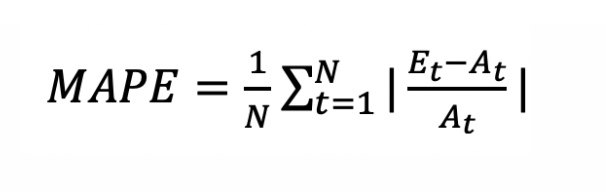

### Assessment
To ensure robust and unbiased assessment, we applied a **RepeatedKFold cross-validation** approach (n_splits=10, n_repeats=3). This means that our dataset was divided into subsets, and our models were trained and tested on different combinations of those subsets to assess their accuracy. Simultanouesly, by using this method, the training part haven't lost its volume of the information provided for training part of the modeling.

### Hyperparameters tuning
For efficient and synergic hyperparameters, we utilized the **GridSearchCV** (cv=5). We carefully learned the impact of the hyperparameters, plotting one by one their dependency plot on the assessment metric. By plotting either the train and validation sample for the hyperparameters, we were aware of potential overfitting consequences. Holding the level of spread MSE between traing and validation sample, we gradually adjusted the parameters grid provided to the model, and thus, in most precise way defined the best parameters.

### Reversed Box-Cox transformation
To make sure that conculsion based on other assessment metrics (MAE, MSE) are correlated with conclusion based on MAPE, we perform Box-Cox transformation.

lambda_best_fit = 0.18321839234213455 (lambda for Box-Cox transformation)

In [4]:
# Import results

import pandas as pd

y_test_t = pd.read_csv('data/y_test_t.csv')
y_pred_DTR_t = pd.read_csv('data/y_pred_DTR.csv')
y_pred_STACK_t = pd.read_csv('data/y_pred_STACK.csv')
y_pred_XGB_t = pd.read_csv('data/y_pred_XGB.csv')
y_pred_RF_t = pd.read_csv('data/y_pred_RF.csv')

In [58]:
# Reverse Box-Cox transformation

from scipy import special

lambda_best_fit = 0.18321839234213455

y_test_alternative = special.inv_boxcox(y_test_t, lambda_best_fit)
y_pred_DTR = special.inv_boxcox(y_pred_DTR_t, lambda_best_fit)
y_pred_STACK = special.inv_boxcox(y_pred_STACK_t, lambda_best_fit)
y_pred_XGB = special.inv_boxcox(y_pred_XGB_t, lambda_best_fit)
y_pred_RF = special.inv_boxcox(y_pred_RF_t, lambda_best_fit)

In [59]:
# How accurate is reverse transformation

import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/data_after_prep.csv')
X = data.drop(columns=['rented_bike_count']) 
y = data['rented_bike_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
y_test = y_test.reset_index(drop=True)

y_test_alternative_u = y_test_alternative['boxcox_rented_bike_count']

absolute_errors = np.abs(y_test_alternative_u - y_test)
squared_errors = (y_test_alternative_u - y_test) ** 2
percentage_errors = (np.abs(y_test_alternative_u - y_test) / y_test_alternative_u) * 100

mae = np.mean(absolute_errors)
mse = np.mean(squared_errors)
mape = np.mean(percentage_errors)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.00
MSE: 0.00
MAPE: 0.00%


Perfectly accurate.

### MAE, MSE and MAPE for real values

In [60]:
# Random Forest

y_pred_RF_u = y_pred_RF['0']

absolute_errors = np.abs(y_pred_RF_u - y_test)
squared_errors = (y_pred_RF_u - y_test) ** 2
percentage_errors = (np.abs(y_pred_RF_u - y_test) / y_pred_RF_u) * 100

maeRF = np.mean(absolute_errors)
mseRF = np.mean(squared_errors)
mapeRF = np.mean(percentage_errors)

print(f"MAE: {maeRF:.2f}")
print(f"MSE: {mseRF:.2f}")
print(f"MAPE: {mapeRF:.2f}%")

MAE: 98.32
MSE: 31254.34
MAPE: 21.67%


In [62]:
# Decision Tree

y_pred_DTR_u = y_pred_DTR['0']

absolute_errors = np.abs(y_pred_DTR_u - y_test)
squared_errors = (y_pred_DTR_u - y_test) ** 2
percentage_errors = (np.abs(y_pred_DTR_u - y_test) / y_pred_DTR_u) * 100

maeDTR = np.mean(absolute_errors)
mseDTR = np.mean(squared_errors)
mapeDTR = np.mean(percentage_errors)

print(f"MAE: {maeDTR:.2f}")
print(f"MSE: {mseDTR:.2f}")
print(f"MAPE: {mapeDTR:.2f}%")

MAE: 128.82
MSE: 55311.22
MAPE: 33.98%


In [67]:
# XGBOOST

y_pred_XGB_u = y_pred_XGB['0']

absolute_errors = np.abs(y_pred_XGB_u - y_test)
squared_errors = (y_pred_XGB_u - y_test) ** 2
percentage_errors = (np.abs(y_pred_XGB_u - y_test) / y_pred_XGB_u) * 100

maeXGB = np.mean(absolute_errors)
mseXGB = np.mean(squared_errors)
mapeXGB = np.mean(percentage_errors)

print(f"MAE: {maeXGB:.2f}")
print(f"MSE: {mseXGB:.2f}")
print(f"MAPE: {mapeXGB:.2f}%")

MAE: 83.18
MSE: 22373.14
MAPE: 18.22%


In [68]:
# Stacking

y_pred_STACK_u = y_pred_STACK['0']

absolute_errors = np.abs(y_pred_STACK_u - y_test)
squared_errors = (y_pred_STACK_u - y_test) ** 2
percentage_errors = (np.abs(y_pred_STACK_u - y_test) / y_pred_STACK_u) * 100

maeSTACK = np.mean(absolute_errors)
mseSTACK = np.mean(squared_errors)
mapeSTACK = np.mean(percentage_errors)

print(f"MAE: {maeSTACK:.2f}")
print(f"MSE: {mseSTACK:.2f}")
print(f"MAPE: {mapeSTACK:.2f}%")

MAE: 88.58
MSE: 25292.81
MAPE: 20.66%


# Conclusion after reverse Box-Cox

We observe, Box-Cox transformation improved the model less then it was assumed at the modeling part. After transformaption into real values we observe MAPE **twice up to three times higher than assumed**.